In [23]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [24]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [25]:
NUM_CLASSES = 4

# Dataset reading

In [26]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [27]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [30]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_2 (Dropout)          (None, 42)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                860       
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 44        
Total params: 1,114
Trainable params: 1,114
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [32]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [33]:
model.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/200
35/35 [==============================] - 0s 3ms/step - loss: 1.3717 - accuracy: 0.3084 - val_loss: 1.3263 - val_accuracy: 0.3826

Epoch 00001: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 2/200
35/35 [==============================] - 0s 1ms/step - loss: 1.3233 - accuracy: 0.3477 - val_loss: 1.2771 - val_accuracy: 0.4636

Epoch 00002: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 3/200
35/35 [==============================] - 0s 1ms/step - loss: 1.2747 - accuracy: 0.3945 - val_loss: 1.1966 - val_accuracy: 0.5773

Epoch 00003: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 4/200
35/35 [==============================] - 0s 1ms/step - loss: 1.2172 - accuracy: 0.4578 - val_loss: 1.1096 - val_accuracy: 0.6780

Epoch 00004: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 5/200
35/35 [==============================] - 0s 1ms/step - loss: 1.1650 - accuracy: 0.4898 - val_loss: 1

35/35 [==============================] - 0s 1ms/step - loss: 0.6356 - accuracy: 0.7537 - val_loss: 0.2906 - val_accuracy: 0.9537

Epoch 00038: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 39/200
35/35 [==============================] - 0s 1ms/step - loss: 0.6326 - accuracy: 0.7590 - val_loss: 0.2920 - val_accuracy: 0.9523

Epoch 00039: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 40/200
35/35 [==============================] - 0s 1ms/step - loss: 0.6163 - accuracy: 0.7680 - val_loss: 0.2794 - val_accuracy: 0.9585

Epoch 00040: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 41/200
35/35 [==============================] - 0s 1ms/step - loss: 0.6073 - accuracy: 0.7671 - val_loss: 0.2769 - val_accuracy: 0.9571

Epoch 00041: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 42/200
35/35 [==============================] - 0s 1ms/step - loss: 0.6115 - accuracy: 0.7776 - val_loss: 0.2773 - 

35/35 [==============================] - 0s 1ms/step - loss: 0.5495 - accuracy: 0.7982 - val_loss: 0.2303 - val_accuracy: 0.9592

Epoch 00075: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 76/200
35/35 [==============================] - 0s 1ms/step - loss: 0.5465 - accuracy: 0.7962 - val_loss: 0.2271 - val_accuracy: 0.9673

Epoch 00076: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 77/200
35/35 [==============================] - 0s 1ms/step - loss: 0.5440 - accuracy: 0.7989 - val_loss: 0.2291 - val_accuracy: 0.9639

Epoch 00077: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 78/200
35/35 [==============================] - 0s 1ms/step - loss: 0.5478 - accuracy: 0.7923 - val_loss: 0.2412 - val_accuracy: 0.9537

Epoch 00078: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 79/200
35/35 [==============================] - 0s 1ms/step - loss: 0.5499 - accuracy: 0.7973 - val_loss: 0.2267 - 

35/35 [==============================] - 0s 1ms/step - loss: 0.4903 - accuracy: 0.8166 - val_loss: 0.2100 - val_accuracy: 0.9598

Epoch 00112: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 113/200
35/35 [==============================] - 0s 1ms/step - loss: 0.5053 - accuracy: 0.8137 - val_loss: 0.2103 - val_accuracy: 0.9612

Epoch 00113: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 114/200
35/35 [==============================] - 0s 1ms/step - loss: 0.5166 - accuracy: 0.8134 - val_loss: 0.2122 - val_accuracy: 0.9626

Epoch 00114: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 115/200
35/35 [==============================] - 0s 1ms/step - loss: 0.5185 - accuracy: 0.8073 - val_loss: 0.2179 - val_accuracy: 0.9619

Epoch 00115: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 116/200
35/35 [==============================] - 0s 1ms/step - loss: 0.5041 - accuracy: 0.8157 - val_loss: 0.214


Epoch 00148: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 149/200
35/35 [==============================] - 0s 1ms/step - loss: 0.4916 - accuracy: 0.8198 - val_loss: 0.2140 - val_accuracy: 0.9537

Epoch 00149: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 150/200
35/35 [==============================] - 0s 1ms/step - loss: 0.4704 - accuracy: 0.8250 - val_loss: 0.2058 - val_accuracy: 0.9537

Epoch 00150: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 151/200
35/35 [==============================] - 0s 1ms/step - loss: 0.4909 - accuracy: 0.8091 - val_loss: 0.2130 - val_accuracy: 0.9517

Epoch 00151: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 152/200
35/35 [==============================] - 0s 1ms/step - loss: 0.4680 - accuracy: 0.8325 - val_loss: 0.2166 - val_accuracy: 0.9510

Epoch 00152: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 153/200
35/35 [==

In [34]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

12/12 [==============================] - 0s 664us/step - loss: 0.2190 - accuracy: 0.9544


In [35]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [36]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[0.04026727 0.0034712  0.01778059 0.9384809 ]
3


# Confusion matrix

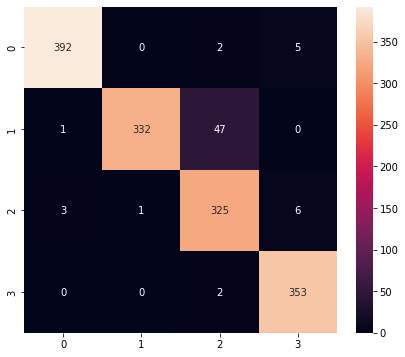

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       399
           1       1.00      0.87      0.93       380
           2       0.86      0.97      0.91       335
           3       0.97      0.99      0.98       355

    accuracy                           0.95      1469
   macro avg       0.96      0.96      0.95      1469
weighted avg       0.96      0.95      0.95      1469



In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [38]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [39]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpupengk31/assets


INFO:tensorflow:Assets written to: /tmp/tmpupengk31/assets
2021-09-23 09:56:27.965048: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-23 09:56:27.965322: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2021-09-23 09:56:27.965368: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2021-09-23 09:56:27.965590: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-23 09:56:27.965819: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1835] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at http

6400

# Inference test

In [40]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [41]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [42]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [43]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 221 µs, sys: 24 µs, total: 245 µs
Wall time: 203 µs


In [44]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.04026728 0.0034712  0.01778059 0.9384809 ]
3
